# Sanity Checks

In [38]:
using Base.Filesystem  # for creaating directories etc
using Random, Distributions  # random numbers
using HDF5  # hdf5 files
using QuantumClifford  # this is the stabilizer simulation package
using Plots # for plotting
using Formatting # string formatting
using LinearAlgebra # some useful matrices etc.
include("AdditionalStructure/NewTypes.jl")
include("AdditionalStructure/BitStringOps.jl")
include("AdditionalStructure/Measurements.jl")
include("AdditionalStructure/MICModels.jl")
include("AdditionalStructure/ModelRuns.jl")
include("AdditionalStructure/HelperTools.jl")
include("AdditionalStructure/Iterators.jl");

In [13]:
# Geometry and other useful constant are packed in this struct, EdgeSquareLattice and VertexSquareLattice

L = 17
d = 2
system = Init_EdgeSquareLattice_KitaevDoNuT(L, d);

# Unwrap the main function to be run interactively

p_anyon = 0 # The change of applying an anyon of a given type vs a TC stabiliser!
p_tc = 1 - p_anyon
stab_distro_e = Categorical([p_tc/2, p_tc/2, p_anyon/2, p_anyon/2, 0, 0, 0, 0]) # In this case we condense e particles!
stab_distro_m = Categorical([p_tc/2, p_tc/2, 0, 0, p_anyon/2, p_anyon/2, 0, 0]) # In this case we condense m particles!
stab_distro_f = Categorical([p_tc/2, p_tc/2, 0, 0, 0, 0, p_anyon/2, p_anyon/2]) # In this case we condense f particles!
stab_distro = stab_distro_f


nt = Int(5*1e1)  # total number of time steps to evolve
nmeasure = 6 # number of measurements (log-spaced in time)
measure_ts = exp10.(range(0, log10(nt+1), length=nmeasure)) # times at which to measure stuff
simulation = SimulationTime(nt, measure_ts)
L = system.L
nbits = system.nbits;

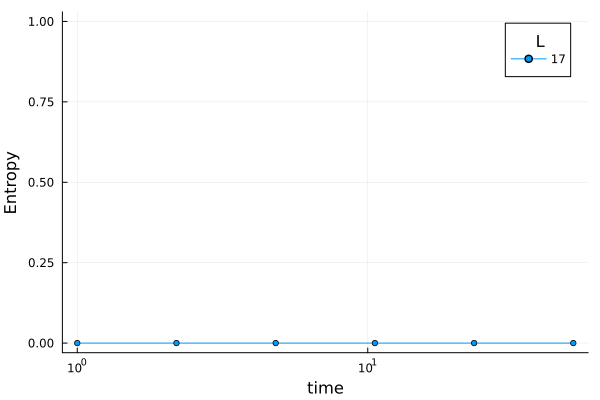

1×6 adjoint(::Matrix{Float64}) with eltype Float64:
 0.0  0.0  0.0  0.0  0.0  0.0

In [14]:
number_of_experiments = 50
Observables_t = zeros(nmeasure, number_of_experiments)
Threads.@threads for exp_index  in 1:number_of_experiments

    state = z_polarised_state(system)

    # this is running the actual dynamics simulation (RENAME)
    Observable_t = run_measurement_only_dynamics_PURE!(MixedDestabilizer(state), # evolve this
                                            () -> toric_code(system, stab_distro),  # bind 
                                            system,
                                            simulation)

    Observables_t[:, exp_index] = Observable_t

end

Observables_t_avr = sum(Observables_t, dims=2)/number_of_experiments

# plot entropy as function of time
p = plot(measure_ts, Observables_t_avr,
    xlabel="time",
    ylabel="Entropy",
    marker=(:circle, 3),
    xscale=:log10,
    legendtitle="L",
    label=L)
# gui()  # this is the equivalent of matplotlibs show()
# Note: not needed since we are plotting in the cell (with added name to the plot "p")
display(p)
Observables_t_avr'

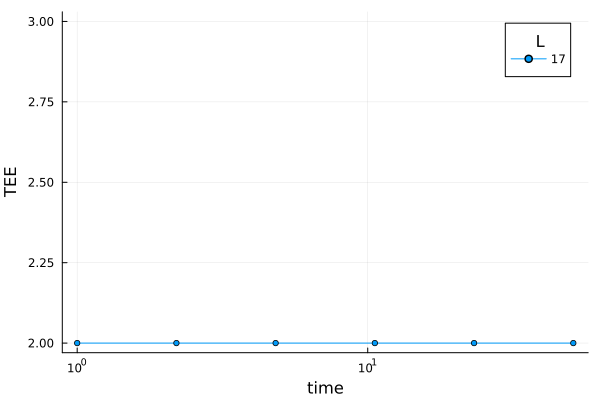

1×6 adjoint(::Matrix{Float64}) with eltype Float64:
 2.0  2.0  2.0  2.0  2.0  2.0

In [8]:
number_of_experiments = 50
Observables_t = zeros(nmeasure, number_of_experiments)
Threads.@threads for exp_index  in 1:number_of_experiments

    state = toric_code_GS(system)

    # this is running the actual dynamics simulation (RENAME)
    Observable_t = run_measurement_only_dynamics_TEE!(MixedDestabilizer(state), # evolve this
                                            () -> toric_code(system, stab_distro),  # bind 
                                            system,
                                            simulation)

    Observables_t[:, exp_index] = Observable_t

end

Observables_t_avr = sum(Observables_t, dims=2)/number_of_experiments

# plot entropy as function of time
p = plot(measure_ts, Observables_t_avr,
    xlabel="time",
    ylabel="TEE",
    marker=(:circle, 3),
    xscale=:log10,
    legendtitle="L",
    label=L)
# gui()  # this is the equivalent of matplotlibs show()
# Note: not needed since we are plotting in the cell (with added name to the plot "p")
display(p)
Observables_t_avr'

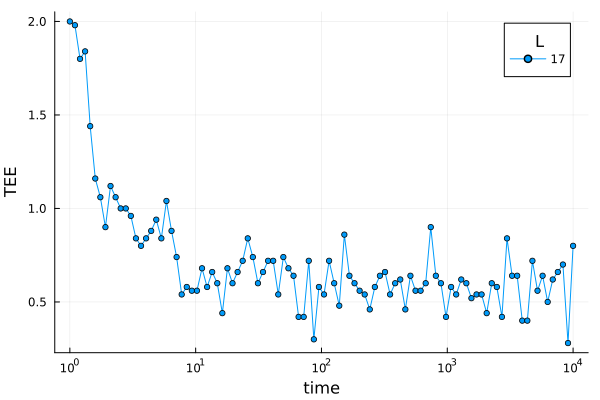

1×100 adjoint(::Matrix{Float64}) with eltype Float64:
 2.0  1.98  1.8  1.84  1.44  1.16  1.06  …  0.5  0.62  0.66  0.7  0.28  0.8

In [22]:
number_of_experiments = 50

nt = Int(1e4)  # total number of time steps to evolve
nmeasure = 100 # number of measurements (log-spaced in time)
measure_ts = exp10.(range(0, log10(nt+1), length=nmeasure)) # times at which to measure stuff
simulation = SimulationTime(nt, measure_ts)

Observables_t = zeros(nmeasure, number_of_experiments)
Threads.@threads for exp_index  in 1:number_of_experiments

    p_anyon = 0.2 # The change of applying an anyon of a given type vs a TC stabiliser!
    p_tc = 1 - p_anyon
    stab_distro_e = Categorical([p_tc/2, p_tc/2, p_anyon, 0, 0]) # In this case we condense e particles!
    stab_distro_m = Categorical([p_tc/2, p_tc/2, 0, p_anyon, 0]) # In this case we condense m particles!
    stab_distro_f = Categorical([p_tc/2, p_tc/2, 0, 0, p_anyon]) # In this case we condense f particles!
    stab_distro = stab_distro_e 

    state = toric_code_GS_MIXED(system)

    # this is running the actual dynamics simulation (RENAME)
    Observable_t = run_measurement_only_dynamics_TEE!(MixedDestabilizer(state), # evolve this
                                            () -> toric_code(system, stab_distro),  # bind 
                                            system,
                                            simulation)

    Observables_t[:, exp_index] = Observable_t

end

Observables_t_avr = sum(Observables_t, dims=2)/number_of_experiments

# plot entropy as function of time
p = plot(measure_ts, Observables_t_avr,
    xlabel="time",
    ylabel="TEE",
    marker=(:circle, 3),
    xscale=:log10,
    legendtitle="L",
    label=L)
# gui()  # this is the equivalent of matplotlibs show()
# Note: not needed since we are plotting in the cell (with added name to the plot "p")
display(p)
Observables_t_avr'

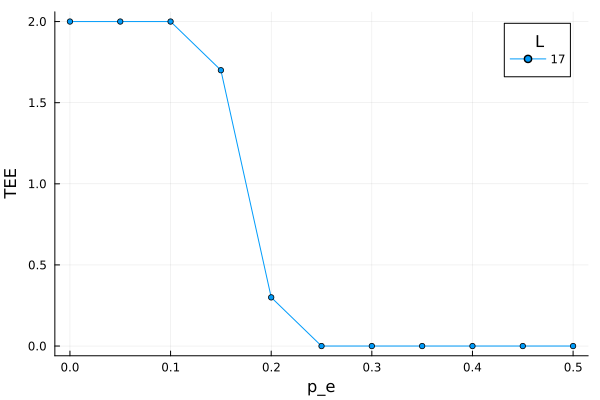

1×11 adjoint(::Matrix{Float64}) with eltype Float64:
 2.0  2.0  2.0  1.7  0.3  0.0  0.0  0.0  0.0  0.0  0.0

In [39]:
number_of_experiments = 10
t_iterate = Integer(1e4)
nmeasure = 11 # number of probabilities
p_anyon_arr = range(0, 0.5, length=nmeasure)
Observables_p = zeros(nmeasure, number_of_experiments)

Threads.@threads for p_index in 1:nmeasure
    p_anyon = p_anyon_arr[p_index] # The change of applying an anyon of a given type vs a TC stabiliser!
    p_tc = 1 - p_anyon
    stab_distro = Categorical([p_tc/2, p_tc/2, p_anyon, 0, 0]) # In this case we condense e particles!

    for exp_index  in 1:number_of_experiments

        state = toric_code_GS_MIXED(system)

        # this is running the actual dynamics simulation (RENAME)
        state = iterate_measurements_only!(state, system, () -> toric_code(system, stab_distro), t_iterate)
        Observables_p[p_index, exp_index] = entanglement_entropy_topo(state, system)

    end
    
end

Observables_p_avr = sum(Observables_p, dims=2)/number_of_experiments

# plot entropy as function of time
p = plot(p_anyon_arr, Observables_p_avr,
    xlabel="p_e",
    ylabel="TEE",
    marker=(:circle, 3),
    legendtitle="L",
    label=L)
# gui()  # this is the equivalent of matplotlibs show()
# Note: not needed since we are plotting in the cell (with added name to the plot "p")
display(p)
Observables_p_avr'

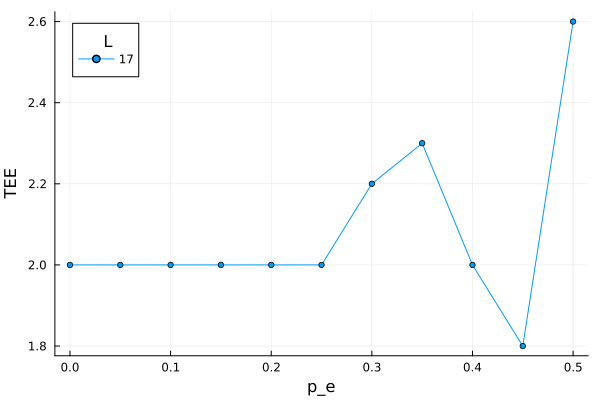

1×11 adjoint(::Matrix{Float64}) with eltype Float64:
 2.0  2.0  2.0  2.0  2.0  2.0  2.2  2.3  2.0  1.8  2.6

In [40]:
number_of_experiments = 10
t_iterate = Integer(1e5)
nmeasure = 11 # number of probabilities
p_anyon_arr = range(0, 1, length=nmeasure)
Observables_p = zeros(nmeasure, number_of_experiments)

Threads.@threads for p_index in 1:nmeasure
    p_anyon = p_anyon_arr[p_index] # The change of applying an anyon of a given type vs a TC stabiliser!
    p_tc = 1 - p_anyon
    stab_distro = Categorical([p_tc/2, p_tc/2, 0, 0, p_anyon]) # In this case we condense f particles!

    for exp_index  in 1:number_of_experiments

        state = toric_code_GS_MIXED(system)

        # this is running the actual dynamics simulation (RENAME)
        state = iterate_measurements_only!(state, system, () -> toric_code(system, stab_distro), t_iterate)
        Observables_p[p_index, exp_index] = entanglement_entropy_topo(state, system)

    end
    
end

Observables_p_avr = sum(Observables_p, dims=2)/number_of_experiments

# plot entropy as function of time
p = plot(p_anyon_arr, Observables_p_avr,
    xlabel="p_e",
    ylabel="TEE",
    marker=(:circle, 3),
    legendtitle="L",
    label=L)
# gui()  # this is the equivalent of matplotlibs show()
# Note: not needed since we are plotting in the cell (with added name to the plot "p")
display(p)
Observables_p_avr'

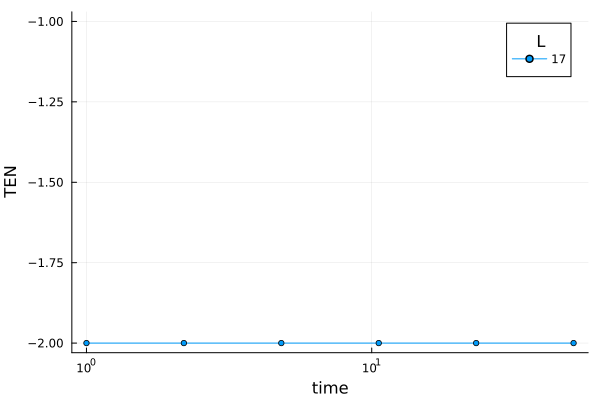

1×6 adjoint(::Matrix{Float64}) with eltype Float64:
 -2.0  -2.0  -2.0  -2.0  -2.0  -2.0

In [10]:
number_of_experiments = 1
Observables_t = zeros(nmeasure, number_of_experiments)
for exp_index  in 1:number_of_experiments

    state = toric_code_GS_MIXED(system)

    # this is running the actual dynamics simulation (RENAME)
    Observable_t = run_measurement_only_dynamics_TEN!(MixedDestabilizer(state), # evolve this
                                            () -> toric_code(system, stab_distro),  # bind 
                                            system,
                                            simulation)

    Observables_t[:, exp_index] = Observable_t

end

Observables_t_avr = sum(Observables_t, dims=2)/number_of_experiments

# plot entropy as function of time
p = plot(measure_ts, Observables_t_avr,
    xlabel="time",
    ylabel="TEN",
    marker=(:circle, 3),
    xscale=:log10,
    legendtitle="L",
    label=L)
# gui()  # this is the equivalent of matplotlibs show()
# Note: not needed since we are plotting in the cell (with added name to the plot "p")
display(p)
Observables_t_avr'

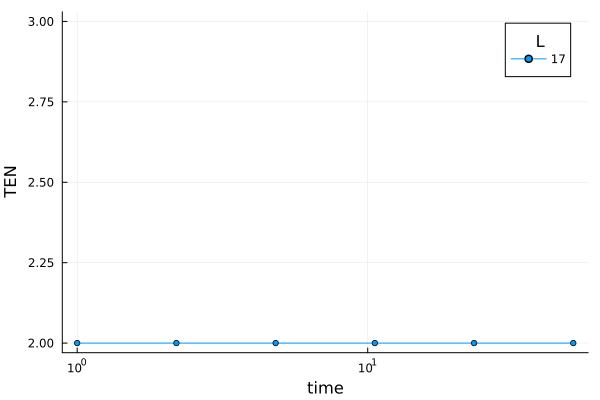

1×6 adjoint(::Matrix{Float64}) with eltype Float64:
 2.0  2.0  2.0  2.0  2.0  2.0

In [11]:
number_of_experiments = 1
Observables_t = zeros(nmeasure, number_of_experiments)
for exp_index  in 1:number_of_experiments

    state = toric_code_GS(system)

    # this is running the actual dynamics simulation (RENAME)
    Observable_t = run_measurement_only_dynamics_TEN!(MixedDestabilizer(state), # evolve this
                                            () -> toric_code(system, stab_distro),  # bind 
                                            system,
                                            simulation)

    Observables_t[:, exp_index] = Observable_t

end

Observables_t_avr = sum(Observables_t, dims=2)/number_of_experiments

# plot entropy as function of time
p = plot(measure_ts, Observables_t_avr,
    xlabel="time",
    ylabel="TEN",
    marker=(:circle, 3),
    xscale=:log10,
    legendtitle="L",
    label=L)
# gui()  # this is the equivalent of matplotlibs show()
# Note: not needed since we are plotting in the cell (with added name to the plot "p")
display(p)
Observables_t_avr'